In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt


df=pd.read_csv("./data_formatted/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

df = df.dropna()
df = df[(df.player1_plays > 100) & (df.player2_plays>100)]
df.shape

FileNotFoundError: [Errno 2] No such file or directory: './data_formatted/training_dataset.csv'

In [174]:
from sklearn.model_selection import train_test_split

X = df[["player1_name", "player1_age", "player1_atprank", "player1_plays", "player1_wins", "player1_losses", "player1_elo", "player1_mean_serve_rating",  "player1_height", "player1_weight", #"player1_oddsB365",
        "player2_name", "player2_age", "player2_atprank", "player2_plays", "player2_wins", "player2_losses", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", #"player2_oddsB365",
        "match_date"]]
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)#,  shuffle=False)


In [175]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 

col_to_drop = ["player1_name", "player2_name", "match_date"]
X_train_filtered = X_train.drop(col_to_drop,axis=1)
X_test_filtered = X_test.drop(col_to_drop,axis=1)

scaler = MinMaxScaler()
col_to_minmax_scale = ["player1_plays", "player1_wins", "player1_losses","player1_elo",
                       "player2_plays","player2_wins", "player2_losses", "player2_elo"]
scaler.fit(X_train_filtered[col_to_minmax_scale])
X_train_filtered[col_to_minmax_scale] = scaler.transform(X_train_filtered[col_to_minmax_scale])
X_test_filtered[col_to_minmax_scale] = scaler.transform(X_test_filtered[col_to_minmax_scale])

scaler = StandardScaler()
col_to_std_scale = ["player1_age", "player1_atprank", "player1_elo", "player1_mean_serve_rating", "player1_height", "player1_weight", "player1_oddsB365",
         "player2_age", "player2_atprank", "player2_elo", "player2_mean_serve_rating",  "player2_height", "player2_weight", "player2_oddsB365",]
scaler.fit(X_train_filtered[col_to_std_scale])
X_train_filtered[col_to_std_scale] = scaler.transform(X_train_filtered[col_to_std_scale])
X_test_filtered[col_to_std_scale] = scaler.transform(X_test_filtered[col_to_std_scale])

X_train_filtered = pd.DataFrame(X_train_filtered)
X_test_filtered = pd.DataFrame(X_test_filtered)

X_train_filtered.head()

,player1_age,player1_atprank,player1_plays,player1_wins,player1_losses,player1_elo,player1_mean_serve_rating,player1_height,player1_weight,player1_oddsB365,player2_age,player2_atprank,player2_plays,player2_wins,player2_losses,player2_elo,player2_mean_serve_rating,player2_height,player2_weight,player2_oddsB365
36588,1.730121,-0.376712,0.551136,0.353734,0.739130,-0.305578,0.900362,0.205404,0.893342,-0.253027,-0.191791,-0.571575,0.351607,0.292961,0.353093,0.175848,0.187674,1.592830,1.006978,-0.366514
48302,3.254058,0.756124,0.721591,0.446058,0.971867,-1.082868,0.998434,0.205404,0.893342,0.293003,-0.165961,0.592507,0.046314,0.036232,0.159794,-0.974284,0.142153,-0.491490,0.081153,-0.511424
35406,0.566320,0.350541,0.436553,0.320539,0.511509,-0.344016,0.565301,-0.500585,0.625171,0.136995,-1.628649,-0.455167,0.015123,0.037267,0.072165,-0.182372,0.099997,-0.213580,-0.315629,-0.500277
45418,1.610567,-0.642439,0.850379,0.830913,0.370844,0.950044,0.604736,-0.218189,0.491086,-0.623547,0.205246,-0.488426,0.110586,0.107660,0.157216,-0.203632,0.196860,0.203284,-0.447890,3.081604
17401,-1.504463,-0.502583,0.099432,0.094398,0.158568,0.062780,0.356024,1.334985,1.295599,-0.405135,-1.238993,-0.089312,0.106805,0.098344,0.170103,0.174785,0.536266,0.898057,0.742457,-0.188163


Epoch 1/100
158/206 [======================>.......] - ETA: 0s - loss: 0.6064 - accuracy: 0.6654
Epoch 1: accuracy improved from -inf to 0.66956, saving model to ./models\
206/206 [==============================] - 1s 1ms/step - loss: 0.6016 - accuracy: 0.6696 - val_loss: 0.5863 - val_accuracy: 0.6927 - lr: 0.0010
Epoch 2/100
172/206 [========================>.....] - ETA: 0s - loss: 0.5785 - accuracy: 0.6946
Epoch 2: accuracy improved from 0.66956 to 0.69294, saving model to ./models\
206/206 [==============================] - 0s 892us/step - loss: 0.5794 - accuracy: 0.6929 - val_loss: 0.5786 - val_accuracy: 0.6850 - lr: 0.0010
Epoch 3/100
169/206 [=======================>......] - ETA: 0s - loss: 0.5759 - accuracy: 0.6931
Epoch 3: accuracy did not improve from 0.69294
206/206 [==============================] - 0s 805us/step - loss: 0.5775 - accuracy: 0.6899 - val_loss: 0.5762 - val_accuracy: 0.6844 - lr: 0.0010
Epoch 4/100
170/206 [=======================>......] - ETA: 0s - loss: 0.

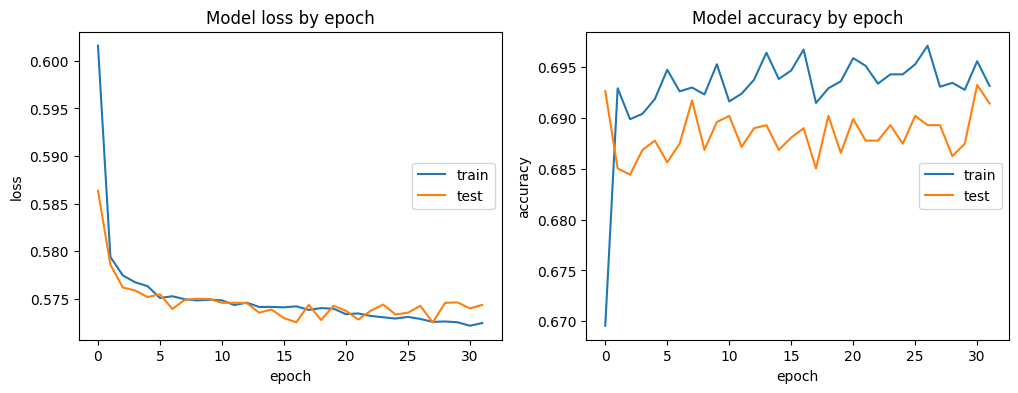

In [176]:
import keras
from keras.layers import Dense
import matplotlib.pyplot as plt

model = keras.Sequential()
model.add(Dense(X_train_filtered.shape[1]))
model.add(Dense(X_train_filtered.shape[1]*2))
model.add(Dense(X_train_filtered.shape[1], activation='sigmoid'))
#model.add(Dense(X_train_filtered.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

earlystopping = keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.01,
    patience=30,
    mode='auto',
    baseline=None
)
model_folder = "./models/"

checkpoint = keras.callbacks.ModelCheckpoint(model_folder, 
                    monitor="accuracy", mode="max", 
                    save_weights_only=True,
                    save_best_only=True, verbose=1)

reduce_lr  = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=10,
    mode="auto",
    min_delta=0.0001,
    min_lr=0.001,
)

opt = keras.optimizers.Adam(learning_rate=0.001)


model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_filtered, y_train,                    
                        epochs = 100,                         
                        batch_size = 64,
                        callbacks=[earlystopping,reduce_lr, checkpoint],#earlystopping, reduce_lr       
                        validation_data=(X_test_filtered, y_test))   

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss by epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy by epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='right')
plt.show()

In [177]:
from sklearn.metrics import accuracy_score
model.load_weights(model_folder)
y_predict = model.predict(X_test_filtered)

print('Accuracy :', accuracy_score(y_predict.round(), y_test))

103/103 [==============================] - 0s 490us/step
Accuracy : 0.6893085592445933


In [178]:
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

df_roi["proba_bookmaker"] = (1/df_roi.player1_oddsB365).round()
df_roi[["player1_name","player1_oddsB365","player2_name","player2_oddsB365", "y_test", "proba_bookmaker", "y_predict", "y_predict_proba",]]


,player1_name,player1_oddsB365,player2_name,player2_oddsB365,y_test,proba_bookmaker,y_predict,y_predict_proba
31288,Robin Haase,2.37,Lukas Rosol,1.57,0,0.0,0.0,0.427433
34135,Fernando Verdasco,1.44,Robin Haase,2.62,0,1.0,1.0,0.574288
22329,Mikhail Youzhny,1.20,Nicolas Kiefer,4.33,0,1.0,1.0,0.776738
21662,James Blake,1.90,David Ferrer,1.80,1,1.0,0.0,0.455397
38209,Jiri Vesely,2.10,Marcel Granollers,1.66,0,0.0,0.0,0.431155
...,...,...,...,...,...,...,...,...
15439,Nikolay Davydenko,1.83,Mikhail Youzhny,1.83,1,1.0,0.0,0.475827
13731,Xavier Malisse,1.36,Fabrice Santoro,3.00,1,1.0,1.0,0.725873
36078,Marcel Granollers,4.50,Gael Monfils,1.20,0,0.0,0.0,0.172712
16617,Fernando Verdasco,1.25,Rainer Schuettler,3.75,1,1.0,1.0,0.757605


In [181]:
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict.round()
df_roi["y_test"] = y_test

#df_roi= df_roi.loc[df_roi["y_predict_proba"]>0.9]

money_invested=df_roi.shape[0]

money_won = 0.0
for index, row in df_roi.iterrows():
    if row.y_predict == row.y_test :
        if row.y_predict == 0 :
            money_won += row.player2_oddsB365
        else:
            money_won += row.player1_oddsB365

print("money spent:", money_invested,"€")
print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won - money_invested, 2),"€")
print("ROI:", round(money_won*100/money_invested,2),"%")

money spent: 80 €
money won: 78.21 €
TOTAL: -1.79 €
ROI: 97.76 %
